NFL Trends Analysis

Fall 2024 Data Science Project

Names: Daniel Kolen, Liam Gedeon, Kevin Lin, Bill Ngo, Nikhil Kalakonnavar

Contributions:
(For each member, list which of the following sections they worked on, and
summarize the contributions in 1-2 sentences. Be specific!)

Daniel Kolen: I added the questions in the project idea and completed parts D and E.

Liam Gedeon: Project idea description, Part F visuals, imports

Kevin Lin: I completed insights and conclusions, and modified data curation to ensure clarity.

Bill Ngo: I helped the project get kick started working on data curation, to data explatory helping making the graph and working on parts of the ML

Nikhil Kalakonnavar: Data visuals/exploration, insights and conlcusions.

A: Project idea

American football is a highly complex sport that demands extensive game planning and strategic thinking, particularly at the professional level. As passionate football fans, we are eager to explore how the game has evolved over time at its highest level of play. Our analysis focuses on uncovering patterns from games over the past 25 years to identify shifts in strategy and understand how these changes have shaped the sport. By examining these trends, we hope to provide insights into the future direction of the game and its ongoing evolution. We aim to answer questions such as:



*   How has the strategy of football change over time?
*   Can football coaches utilize machine learning to better prepare their defensive play calls?
*   What factors most affect whether a team will call a run or a pass play?





In [33]:
!pip install nfl_data_py

In [34]:
#Imports
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import pearsonr, ttest_rel, f_oneway, tukey_hsd
import requests
from bs4 import BeautifulSoup as bs
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.model_selection import cross_validate

B: Data Curation (Bill Ngo, Kevin Lin)

We used NFL_data_py libarary to access the official NFL play-by-play data from 1999-2015. (https://pypi.org/project/nfl-data-py/)

If you are unfamiliar with the game of American Football, it is important to understand some basic terminology and rules to follow this tutorial. Check these sources out for some football terminology and rules:


*   https://operations.nfl.com/learn-the-game/nfl-basics/terms-glossary/
*   https://www.nike.com/a/how-to-play-football



First, let's save the data from the selected season range to make it faster to access.

In [35]:
seasons = list(range(1999,2016))
nfl.cache_pbp(seasons)

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.


Next, we will filter the dataset to include only "pass" and "run" play types and add a binary indicator to differientate the plays. We want to only include "pass" and "run" plays because the other types of plays will add extra unwanted noise to our dataset. We will also group the data by game to calculate the percentage of passing plays for each game and split the data into separate group for each year to analyze the trends.

In [36]:
columns= ["play_type", "season", "week", "posteam","old_game_id"]
df = nfl.import_pbp_data(seasons, columns=columns)
df = df[(df["play_type"]=="pass") | (df["play_type"] == "run")]
df["isPass"] = df["play_type"].apply(lambda x: 1 if x == "pass" else 0)

df_grouped = df.groupby(["season", "old_game_id"]).agg(proportion_pass = ("isPass", "mean")).reset_index()

df_grouped.head()

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
Downcasting floats.


,season,old_game_id,proportion_pass
0,1999,1999091200,0.575540
1,1999,1999091202,0.661157
2,1999,1999091203,0.537815
3,1999,1999091204,0.538462
4,1999,1999091205,0.570470


C: Data Exploration and Summary Statistics (All)

Let's look at what type of data we have available for our use in this dataset.

In [37]:
idx = nfl.see_pbp_cols()
for col in idx:
  print(col)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


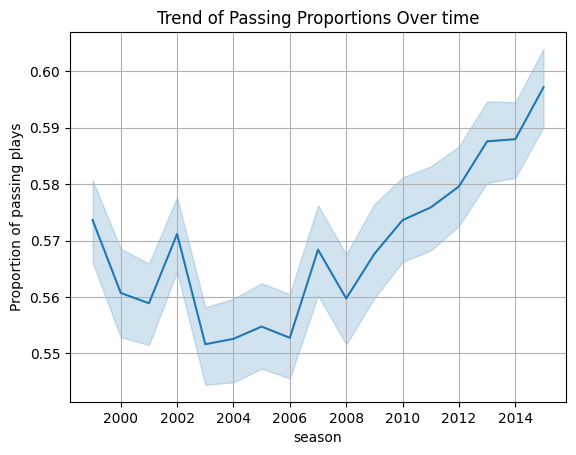

        count      mean       std       min       25%       50%       75%  \
season                                                                      
1999    258.0  0.573646  0.058007  0.413223  0.535021  0.574715  0.614893   
2000    257.0  0.560706  0.062995  0.396825  0.520325  0.561538  0.604839   
2001    259.0  0.558868  0.060365  0.400000  0.516954  0.558824  0.593543   
2002    267.0  0.571162  0.056677  0.390244  0.533616  0.570248  0.612422   
2003    267.0  0.551601  0.057029  0.392523  0.517732  0.553719  0.593208   
2004    267.0  0.552563  0.063952  0.324324  0.512410  0.549180  0.595329   
2005    267.0  0.554734  0.061532  0.245455  0.519532  0.561538  0.592906   
2006    267.0  0.552735  0.063575  0.317308  0.512932  0.550725  0.596029   
2007    267.0  0.568376  0.064028  0.366972  0.525862  0.568966  0.611570   
2008    267.0  0.559720  0.064718  0.305085  0.512932  0.565574  0.603240   
2009    267.0  0.567634  0.069752  0.345455  0.525000  0.567797  0.615963   

In [38]:
plt.figure()
sns.lineplot(data=df_grouped, x="season", y ="proportion_pass")
plt.title("Trend of Passing Proportions Over time")
plt.xlabel("season")
plt.ylabel("Proportion of passing plays")
plt.grid()
plt.show()

summaryStatistics = df_grouped.groupby("season")["proportion_pass"].describe()
print(summaryStatistics)

Hypothesis #1:
Null Hypothesis: The season of a game played does not effect the proportion of pass plays (as opposed to run plays) called in that game.
Alternative Hypothesis: The season of a game played effects the proportion of pass plays (as opposed to run plays) called in that game.

We will use an alpha of 0.05

We notice that there is a "play_type" column. This will be useful to determine if a play is a rushing or a passing attempt. Let's load this data into a data frame and see what types of values we can have for this column.

In [39]:
df = nfl.import_pbp_data([2000,2005,2010, 2015], columns=["play_type", "season", "week"])
df.value_counts(["play_type"])

2000 done.
2005 done.
2010 done.
2015 done.
Downcasting floats.


,0
play_type,
pass,75858
run,56392
no_play,15998
kickoff,10335
punt,10316
extra_point,4777
field_goal,3973
qb_kneel,1223
qb_spike,210


The end goal is to determine if pass plays are being called more frequently than run plays. Therefore, we will drop all entries where the play types is neither a pass or a run.

In [40]:
df = df[(df["play_type"] == "pass") | (df["play_type"] == "run")]
df.value_counts(["play_type"])

,0
play_type,
pass,75858
run,56392


Next, we will separate the data frame into four separate data frames based on the season of the game played. We will also calculate the proportion of pass plays called for each game.

In [41]:
df["isPass"] = df["play_type"].apply(lambda x: 1 if x == "pass" else 0)
df_2000 = df[df["season"] == 2000]
df_2005 = df[df["season"] == 2005]
df_2010 = df[df["season"] == 2010]
df_2015 = df[df["season"] == 2015]
df_2000 = df_2000.groupby("old_game_id")[["isPass", "week"]].mean()
df_2000["week"] = df_2000["week"].astype(int)
df_2005 = df_2005.groupby("old_game_id")[["isPass", "week"]].mean()
df_2005["week"] = df_2005["week"].astype(int)
df_2010 = df_2010.groupby("old_game_id")[["isPass", "week"]].mean()
df_2010["week"] = df_2010["week"].astype(int)
df_2015 = df_2015.groupby("old_game_id")[["isPass", "week"]].mean()
df_2015["week"] = df_2015["week"].astype(int)
print("2000:")
print(df_2000["isPass"].describe())
print("2005:")
print(df_2005["isPass"].describe())
print("2010:")
print(df_2010["isPass"].describe())
print("2015:")
print(df_2015["isPass"].describe())

2000:
count    257.000000
mean       0.560706
std        0.062995
min        0.396825
25%        0.520325
50%        0.561538
75%        0.604839
max        0.711111
Name: isPass, dtype: float64
2005:
count    267.000000
mean       0.554734
std        0.061532
min        0.245455
25%        0.519532
50%        0.561538
75%        0.592906
max        0.761538
Name: isPass, dtype: float64
2010:
count    267.000000
mean       0.573619
std        0.061971
min        0.382609
25%        0.534493
50%        0.573643
75%        0.615910
max        0.730496
Name: isPass, dtype: float64
2015:
count    267.000000
mean       0.597174
std        0.057512
min        0.456897
25%        0.559322
50%        0.602837
75%        0.635290
max        0.743243
Name: isPass, dtype: float64


Since we are comparing the means of four different samples, we will use the anova test to see if we should reject our null hypothesis or not. We will use an alpha of 0.05.

In [42]:
anova = f_oneway(df_2000["isPass"], df_2005["isPass"],df_2010["isPass"], df_2015["isPass"])
anova.pvalue

8.740507846937624e-16

Since our pvalue is much less than our alpha of 0.05, we choose to reject our null hypothesis. This means that the average proportion of pass plays called per game is effected by the season of which the game is played in.

Lets plot this data to observe our differences.

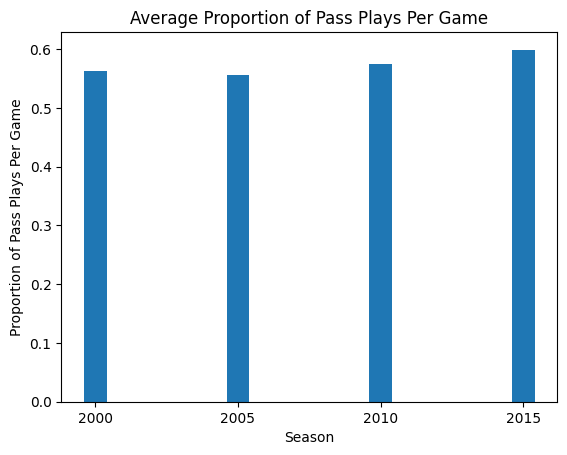

In [43]:
df["season"] = pd.Categorical(df["season"], [2000,2005,2010,2015])
means = df.groupby('season',observed=False)['isPass'].mean()
plt.bar(means.index, means.values)
plt.xticks([2000,2005,2010,2015])
plt.title("Average Proportion of Pass Plays Per Game")
plt.xlabel("Season")
plt.ylabel("Proportion of Pass Plays Per Game")
plt.show()

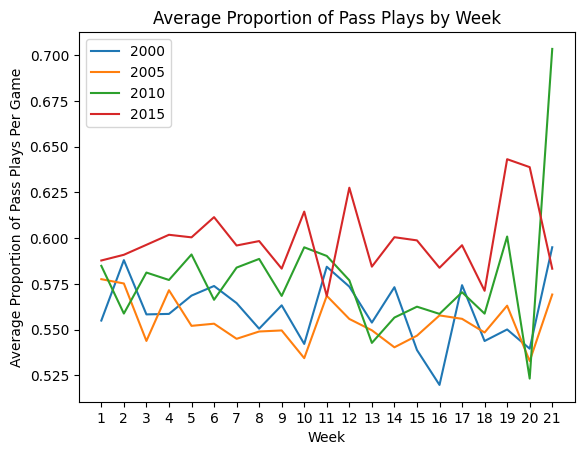

In [44]:
per_week_2000 = df_2000.groupby("week").mean()
per_week_2005 = df_2005.groupby("week").mean()
per_week_2010 = df_2010.groupby("week").mean()
per_week_2015 = df_2015.groupby("week").mean()
plt.plot(per_week_2000, label ='2000')
plt.plot(per_week_2005, label ='2005')
plt.plot(per_week_2010, label ='2010')
plt.plot(per_week_2015, label = '2015')
plt.title("Average Proportion of Pass Plays by Week")
plt.xticks(range(1,22))
plt.xlabel("Week")
plt.ylabel("Average Proportion of Pass Plays Per Game")
plt.legend()
plt.show()

As we can see by the plots, the average proportion of pass plays called per game differs depending on the season. This is consistent with our conclusion from our hypothesis test. There seems to be an upward trend in the proportion of pass plays called as the years progress.

Since we decided to reject our null hypothesis, let's run a post-hoc test to better understand which seasons may be causing this difference. We will use Tukey's HSD test for this.


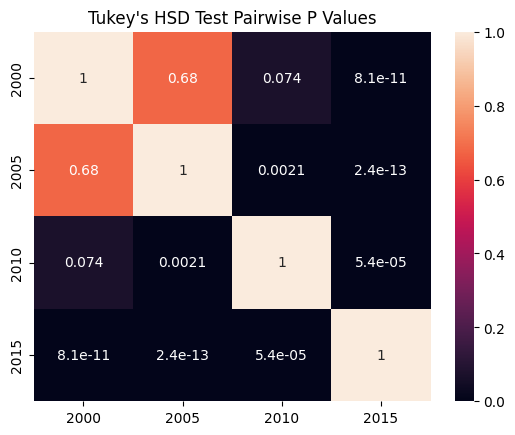

In [45]:
tukey = tukey_hsd(df_2000["isPass"], df_2005["isPass"],df_2010["isPass"], df_2015["isPass"])
pvals = list(tukey.pvalue)
plt.figure()
sns.heatmap(pvals, annot=True,xticklabels=[2000,2005,2010,2015], yticklabels=[2000,2005,2010,2015])
plt.title("Tukey's HSD Test Pairwise P Values")
plt.show()

Looking at the array of p-values from Tukey's HSD test, the only pair of seasons that did not have a significant difference in the proportion of pass plays called per game is 2000 and 2005, with a pairwise p value of 0.82.

Hypothesis #2

Null Hypothesis: There is no linear correlation between the number of passing attempts and the number of interceptions.
Alternative Hypothesis: There is a linear correlation between the number of passing attempts and the number of interceptions.

In [46]:
data = nfl.import_seasonal_data(list(range(2000, 2025)))
data = pd.DataFrame(data)
data.dropna(subset=['attempts', 'interceptions'], inplace=True)
data = data[data['attempts'] > 0]

We decide to test our hypothesis over the years 2000 to 2024. To clean our data, we drop any rows with NaN values in the 'attempts' and 'interception' columns and also make sure that our dataset only includes players who have attempted at least one pass to avoid skewed data.

In [47]:
corr, p_value = pearsonr(data['attempts'], data['interceptions'])
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.8932203488722268
P-value: 0.0


Since we are looking at a linear relationship over two continous variables, we decide to use a pearson correlation test. As such, we calculate the pearson correlation coefficient as well as the p-value with an alpha of 0.05. Since the correlation coefficent comes out to about 0.89 we estimate that there is a strong positive linear correlation between passing attempts and the number of interceptions over a season. Additionally, since the p-value < our alpha of 0.05 we reject the null hypothesis.

In [48]:
filtered_data = data[data['season'].isin([2000, 2005, 2010, 2015, 2020])]

We filtered the data to include only specific seasons (2000, 2005, 2010, 2015, 2020) to provide a clearer and more focused comparison of the relationship between attempts and interceptions over time. This allows us to see whether the pattern holds consistently across key seasons without overwhelming the plot with too much data from every year. We use a linear regression plot with a regression line as it gives a visual representation of the correlation and is especially useful for detecting patterns. The regression line helps reinforce the strength of the correlation observed in the Pearson test.

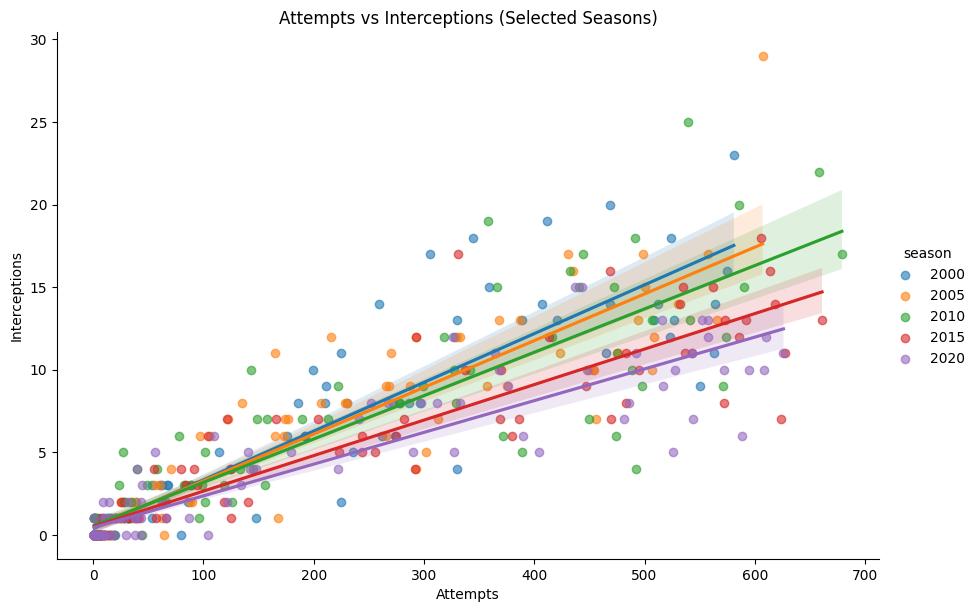

In [49]:
sns.lmplot(x='attempts', y='interceptions', hue='season', data=filtered_data,
           height=6, aspect=1.5, scatter_kws={'alpha':0.6})

plt.title("Attempts vs Interceptions (Selected Seasons)")
plt.xlabel("Attempts")
plt.ylabel("Interceptions")

plt.show()

As we can see, there is a strong positive correlation between passing attempts and interceptions over our selected years. This is consistent with our conclusions from the hypothesis test and the pearson correlation test.

Hypothesis #3

H0: There is no difference between the number of points scored by home and away team

H1: There is a difference between the number of points scored by the home team and the away team

In [50]:
nfl_pbp_data = nfl.import_pbp_data(years=list(range(1999, 2024)), downcast=False)
#downcast is set to False here is because while it does save us 30% or so memory,
#it causes run time speed to be about 50% slower

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.


In [ ]:
nfl_pbp_data['game_date'] = pd.to_datetime(nfl_pbp_data['game_date'])
HomeVsAway = nfl_pbp_data[['game_id', 'posteam', 'home_team', 'away_team', 'posteam_score', 'defteam_score']]

#We are focused on the goals here so we would like to drop any that is NA
HomeVsAway = HomeVsAway.dropna(subset=['posteam_score', 'defteam_score'])

In [ ]:
# Determine if the possession team is the home team
HomeVsAway['is_home'] = HomeVsAway['posteam'] == HomeVsAway['home_team']

#separating home and away scores
#also the ~ is a megation operator in pandas
homeScores = HomeVsAway[HomeVsAway['is_home']].groupby('game_id')['posteam_score'].max()
awayScores = HomeVsAway[~HomeVsAway['is_home']].groupby('game_id')['posteam_score'].max()
scores_df = pd.DataFrame({'home_score': homeScores, 'away_score': awayScores}).dropna()

scores_df.head(20)

In [ ]:
scores_df.describe()

In [ ]:
scores_df.plot(kind='box' , title='Home vs. Away Scores')
plt.ylabel('Score')
plt.show()
#We can see below that home score has way more outliers and that the median is higher as well


In [ ]:
Tstat, Pvalue = ttest_rel(scores_df['home_score'], scores_df['away_score'])

Pvalue

Since the P value is much less then .05, we can safely reject the null hypothesis and say that there is definitely a home team advantage in terms of points scored.

**D**: ML Algorithm Design/Development (Bill Ngo, Daniel Kolen)

The goal here is to predict whether a football team will pass or run the ball in a given situation based on which week in the season it is, how much time is left in the game, what yard line the team with possession is on, the down, the yards to go, and the score of the game. Being able to predict if the opposing team will pass or run in any given circumstance will help defenses be more prepared for what play is likely to be run.

After scaling the features, we train multiple different models on the training data and use them to predict if a play will be a run or a pass on the test data, evaluating each model's performance.

In [ ]:
columns = ["week", "qtr", "quarter_seconds_remaining", "yardline_100", "down", "ydstogo", "score_differential", "play_type"]
df = nfl.import_pbp_data(seasons, columns=columns)
df = df[(df["play_type"]=="pass") | (df["play_type"] == "run")]
df["isPass"] = df["play_type"].apply(lambda x: 1 if x == "pass" else 0)
df = df.drop(["play_type", "play_id", "old_game_id"], axis=1)
df = df.dropna()

E: ML Algorithm Training and Test Data Analysis (Daniel Kolen)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df[["season", "week", "qtr", "quarter_seconds_remaining", "yardline_100", "down", "ydstogo", "score_differential"]]
y = df[["isPass"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
y_train = np.ravel(y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

randomForestModel = RandomForestClassifier(random_state=42, n_estimators=100)
randomForestModel.fit(X_train_scaled, y_train)
yPredRandomForest = randomForestModel.predict(X_test_scaled)
print(classification_report(y_test, yPredRandomForest))

In [ ]:
gradientBoostModel = GradientBoostingClassifier(random_state=42)
gradientBoostModel.fit(X_train_scaled, y_train)
yPredGradientBoost = gradientBoostModel.predict(X_test_scaled)
print(classification_report(y_test, yPredGradientBoost))

In [ ]:
DTModel = DecisionTreeClassifier(random_state=42)
DTModel.fit(X_train_scaled, y_train)
yPredDT = DTModel.predict(X_test_scaled)
print(classification_report(y_test, yPredDT))

In [ ]:
KNNModel = KNeighborsClassifier(n_neighbors=20)
KNNModel.fit(X_train_scaled, y_train)
yPredKNN = KNNModel.predict(X_test_scaled)
print(classification_report(y_test, yPredKNN))

In [ ]:
LogisticModel = LogisticRegression(random_state=42)
LogisticModel.fit(X_train_scaled, y_train)
yPredLog = LogisticModel.predict(X_test_scaled)
print(classification_report(y_test, yPredLog))

Each of the models we tested provided an accuracy between 0.6 and 0.7, which is reasonable performance given how complex and unpredictable NFL gameplans are. The Gradient Boosting Classifier boasted the best accuracy with 0.69, which could provide meaningful strategy guidance for defenses looking to determine if the opposing team will either run or pass the ball.

F: Visualization, Result Analysis, Conclusion (Liam G, Nikhil K)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN', 'Logistic Regression']
accuracies = [0.68, 0.69, 0.61, 0.67, 0.65]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0.5, 0.8)  # Set y-axis limits for better visualization
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracies for Predicting Play Type", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.show()



In [ ]:
importances = randomForestModel.feature_importances_
features = X.columns
plt.figure(figsize=(12, 9))
plt.bar(features, importances, color='teal')
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(importances):
    plt.text(i, v + .005, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
feature_names = X.columns
importances = gradientBoostModel.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(12, 9))
bars = plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{sorted_importances[i]:.2f}", ha='center', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

Insights and Conclusions (Kevin Lin, Nikhil K)
> Throughout this project, we have tried to predict whether a team is going to pass or run the ball in a given scenerio. The different models that we have used included random forest, gradient boosting, decision trees, k nearest neighbors, and logisitic regression. All of these models had accuracies between 60% to 70% which is considerably low, however is to be expected due to the unpredictable and complex nature of NFL games.

> Out of these models, random forest and gradient boosting performed the best with accuracies of 68% and 69% respectively. This makes sense as they are robust models involving the use of multiple decision trees, ensuring that these models are less prone to overfitting. On the other hand, decision trees had the lowest accuracy at just 61%, likely due to the fact that it is more prone to overfitting, especially in prediciting complex outcomes like in NFL games.

> Another interesting finding from this project was related to the random forest model. As one of the key ideas of random forest involves around determining which features are more important to consider and weight compared to the others, it was interesting to find that the number of seconds remaining in the quarter and the yardline where the ball is at had the most impact when predicting the next move. This is logically sound as for features like yardline, it makes sense that if the ball was closer to the goalline, there would be a higher chance that it would be run with in order to reduce the chance that it ends up in the hands of the other team. On the other hand, it also makes sense that features like what quarter the play was in does not have much of an impact on predicting whether the next play would be a pass or run. This is because the next play would be more influenced by immediate factors like the time remaining compared to the the quarter it is not a direct factor.

> Additionally, looking at the gradient model, we found that defenses should prioritize analyzing the down, yards to go, score differential, and time left in the game to predict the likely play. These are the most important factors affecting play-calling decisions. This alligns with traditional football logic as downs and yards to go are typically the most looked at when deciding play calls. On early downs (1st or 2nd down) with short yardage, teams often run the ball to manage risk and set up manageable situations. On later downs (3rd or 4th down) or in long-yardage scenarios, passing becomes more common to maximize the chances of converting. The model's identification of these features as the most important reflects the central role these factors play in traditional football strategies.

> In conclusion, we can say that the results were successful in yielding relevant, logical data that can be applieed to actual NFL games. However, what could be done next is to investigate feature importance over various game scenarios or teams to get more nuanced defensive strategies, more useful and applicable to real scenarios.